## 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Let us read the data
bank = pd.read_csv("bank.csv")


## 2. Understand and Prepare the Data


In [3]:
bank.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
521,58,retired,married,unknown,no,9004,no,no,cellular,21,jul,891,4,-1,0,unknown,yes
2516,76,retired,married,primary,no,3324,no,no,cellular,13,aug,227,2,192,1,failure,yes
8226,38,management,married,tertiary,no,980,no,no,unknown,3,jun,662,5,-1,0,unknown,no
5460,28,blue-collar,single,tertiary,no,1984,yes,no,cellular,4,may,32,2,14,1,failure,no
7996,40,blue-collar,married,primary,no,7831,yes,no,unknown,14,may,78,1,-1,0,unknown,no


In [4]:
bank.shape 
# to check the no of rows and columns

(11162, 17)

In [5]:
# Let us take a look at the data types of the variables
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

## Statistical Summary

In [6]:
#Generate the description for numeric variables
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Missing Data Treatment

In [8]:
#check if the data set contains any null values 
bank.isnull().sum()*100/bank.shape[0]


age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

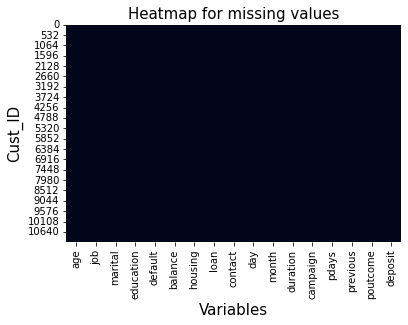

In [9]:
# cbar=False doesnot show the color bar
sns.heatmap(bank.isnull(), cbar=False)

#set the axes and plot lables
#set the font size using "fontsize"
plt.title("Heatmap for missing values",fontsize = 15)
plt.xlabel("Variables",fontsize = 15 )
plt.ylabel("Cust_ID",fontsize = 15 )

plt.show()

There are no horizontal lines in the heatmap which would correspond to a probable missing values.

## 4. EDA

C:\Users\bhumi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

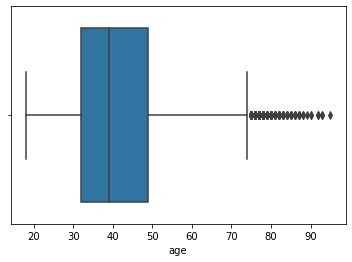

In [10]:
# Outlier analysis for age
sns.boxplot(bank['age'])


# Outlier treatment for age

plt.boxplot(bank.age)
Q1=bank.age.quantile(0.25)
Q3=bank.age.quantile(0.75)
IQR=Q3-Q1
bank = bank[(bank.age >= Q1-1.5*IQR) & (bank.age <= Q3+1.5*IQR)]

In [11]:
bank.shape

(11162, 17)

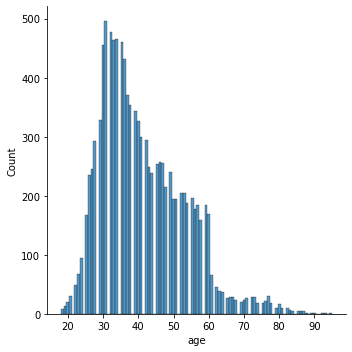

In [12]:
#Distribution of age
sns.displot(bank.age, bins=100)

C:\Users\bhumi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

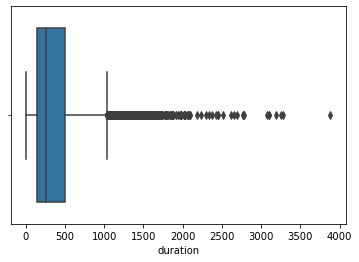

In [13]:
# Outlier analysis for duration
sns.boxplot(bank['duration'])

# Outlier treatment for duration

plt.boxplot(bank.duration)
Q1=bank.duration.quantile(0.25)
Q3=bank.duration.quantile(0.75)
IQR=Q3-Q1
bank = bank[(bank.duration >= Q1-1.5*IQR) & (bank.duration <= Q3+1.5*IQR)]

In [14]:
bank.shape

(11162, 17)

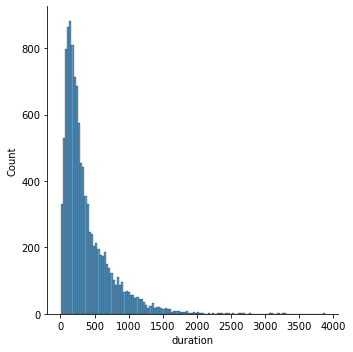

In [15]:
#Distribution of duration
sns.displot(bank.duration)

In [16]:
#Make a copy for parsing
bank_data = bank.copy()

In [17]:
#Explore People who made a deposit Vs Job Category
jobs = ["management" , "blue-collar", "technician", "admin.", "services", "retired", 
        "self-employed", "student", "unemployed", "entrepreneur", "housemaid", "unknown"]
for j in jobs:
    print("{:12} :{:4}".format(j, len(bank_data[(bank_data.deposit == "yes")&(bank_data.job == j)])))

management   :1301
blue-collar  : 708
technician   : 840
admin.       : 631
services     : 369
retired      : 516
self-employed : 187
student      : 269
unemployed   : 202
entrepreneur : 123
housemaid    : 109
unknown      :  34


In [18]:
#Different types of job categories and their counts
bank_data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [19]:
# Combine similar jobs into categories 
bank_data["job"] = bank_data["job"].replace(["management", "admin."], "white-collar")
bank_data["job"] = bank_data["job"].replace(["services", "housemaid"], "pink-collar")
bank_data["job"] = bank_data["job"].replace(["retired", "student", "unemployed", "unknown"], "other")

In [20]:
#New value counts
bank_data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [21]:
bank_data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [22]:
#Combain "unkown" and "other" isn't really match with either "success" or "failure"
bank_data["poutcome"] = bank_data["poutcome"].replace(["other"],"unknown")
bank_data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [23]:
# Drop "contact", as every participant has been contacted.
bank_data.drop("contact", axis = 1, inplace=True)

In [24]:
 # values for "default","loan" ,"deposit": yes/no
num_values = ["default","housing","loan","deposit"]
for i in num_values:
    bank_data[i]=bank_data[i].map({'yes':1,'no':0})

In [25]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,0,2343,1,0,5,may,1042,1,-1,0,unknown,1
1,56,white-collar,married,secondary,0,45,0,0,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,5,may,1389,1,-1,0,unknown,1
3,55,pink-collar,married,secondary,0,2476,1,0,5,may,579,1,-1,0,unknown,1
4,54,white-collar,married,tertiary,0,184,0,0,5,may,673,2,-1,0,unknown,1


In [26]:
# day : Last contact day of the month
# month : Last contact month of year
# Drop "month" and "day" as they don't have any intrinsic meaning
bank_data.drop("month", axis=1, inplace=True)
bank_data.drop("day", axis=1, inplace=True)

In [27]:
print("Customers that have not contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on pdays  :",  bank_data["pdays"].max())

Customers that have not contacted before: 8324
Maximum values on pdays  : 854


In [28]:
bank_data.loc[bank_data["pdays"]== -1, "pdays"] = 10000

In [29]:
#Create a new column: recent_pdays
bank_data["recent_pdays"]= np.where(bank_data["pdays"], 1/bank_data.pdays, 1/bank_data.pdays)
# The numpy.where() function retuens the indices of elements in an input array where the given
#condition is satisfied
# Drop "pdays"
bank_data.drop("pdays", axis= 1, inplace = True)

In [30]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,deposit,recent_pdays
11157,33,blue-collar,single,primary,0,1,1,0,257,1,0,unknown,0,0.000100
11158,39,pink-collar,married,secondary,0,733,0,0,83,4,0,unknown,0,0.000100
11159,32,technician,single,secondary,0,29,0,0,156,2,0,unknown,0,0.000100
11160,43,technician,married,secondary,0,0,0,1,9,2,5,failure,0,0.005814
11161,34,technician,married,secondary,0,0,0,0,628,1,0,unknown,0,0.000100


## Label Encoding for categorical Variable

In [31]:
# convert categorical variables to dummies
bank_with_dummies = pd.get_dummies(data=bank_data, columns=["job", "marital","education", "poutcome"], 
                                   prefix=["job","marital","education", "poutcome"])
bank_with_dummies.head()

,age,default,balance,housing,loan,duration,campaign,previous,deposit,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,1042,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
1,56,0,45,0,0,1467,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
2,41,0,1270,1,0,1389,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
3,55,0,2476,1,0,579,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
4,54,0,184,0,0,673,2,0,1,0.0001,...,0,1,0,0,0,1,0,0,0,1


In [32]:
bank_with_dummies.shape

(11162, 27)

In [33]:
bank_with_dummies.describe()

,age,default,balance,housing,loan,duration,campaign,previous,deposit,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,0.015051,1528.538524,0.473123,0.130801,371.993818,2.508421,0.832557,0.473840,0.003124,...,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,0.121761,3225.413326,0.499299,0.337198,347.128386,2.722077,2.292007,0.499338,0.030686,...,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,122.000000,0.000000,0.000000,138.000000,1.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,550.000000,0.000000,0.000000,255.000000,2.000000,0.000000,0.000000,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,0.000000,1708.000000,1.000000,0.000000,496.000000,3.000000,1.000000,1.000000,0.001919,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,1.000000,81204.000000,1.000000,1.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


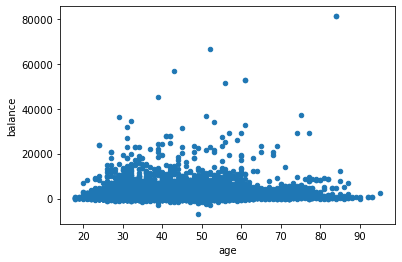

In [34]:
#Scatterplot showing age and balance
bank_with_dummies.plot(kind="scatter", x="age", y="balance");

#Across all ages, majority of people have savings of less than 200000.


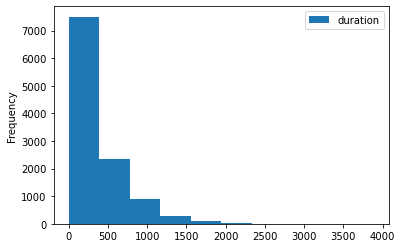

In [35]:
bank_with_dummies.plot(kind="hist", x="poutcome_success", y="duration");

In [36]:
#People who sign up to a term deposit
bank_with_dummies[bank_data.deposit == 1].describe()

,age,default,balance,housing,loan,duration,campaign,previous,deposit,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,0.009832,1804.267915,0.365854,0.091511,537.294574,2.141047,1.170354,1.0,0.004238,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,0.098676,3501.104777,0.481714,0.288361,392.525262,1.921826,2.553272,0.0,0.035686,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,8.000000,1.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,210.000000,0.000000,0.000000,244.000000,1.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,733.000000,0.000000,0.000000,426.000000,2.000000,0.000000,1.0,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,0.000000,2159.000000,1.000000,0.000000,725.000000,3.000000,1.000000,1.0,0.005128,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,1.000000,81204.000000,1.000000,1.000000,3881.000000,32.000000,58.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
#people signed up to term deposit having a (personal loan) and (housing loan)
len(bank_with_dummies[(bank_with_dummies.deposit == 1) & (bank_with_dummies.loan) & (bank_with_dummies.housing)])

265

In [38]:
#People signed up to a term deposit with a credit default
len(bank_with_dummies[(bank_with_dummies.deposit == 1) & (bank_with_dummies.default == 1)])

52

<AxesSubplot:xlabel='job', ylabel='deposit'>

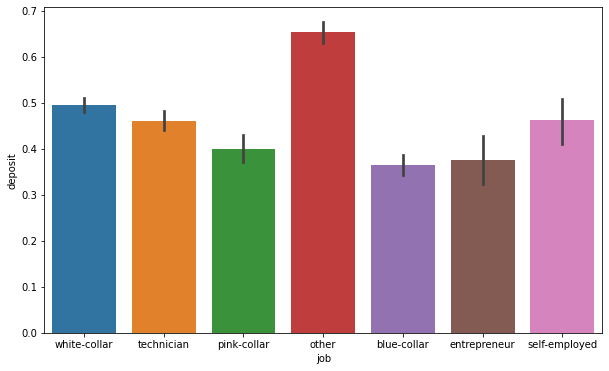

In [39]:
#Bar chart of job Vs deposit
plt.figure(figsize = (10,6))
sns.barplot(x="job", y="deposit", data= bank_data)

<AxesSubplot:xlabel='poutcome', ylabel='duration'>

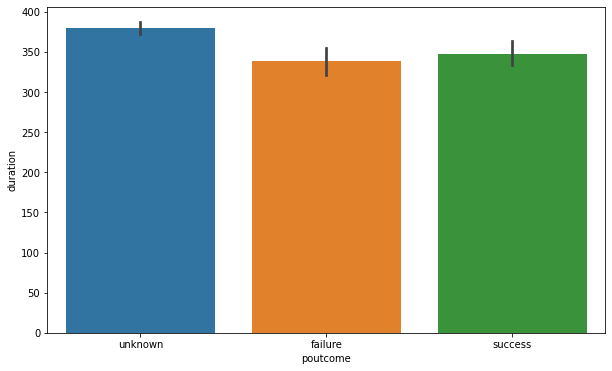

In [40]:
#bar chart pf "previous outcome" Vs "call duration"
plt.figure(figsize = (10,6))
sns.barplot(x="poutcome", y="duration", data=bank_data)

In [41]:
#make a copy
bank_copy= bank_with_dummies

In [42]:
#The Correlation matrix
corr = bank_copy.corr()
corr

,age,default,balance,housing,loan,duration,campaign,previous,deposit,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,-0.011425,0.112300,-0.168700,-0.031418,0.000189,-0.005278,0.020169,0.034901,0.019102,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
default,-0.011425,1.000000,-0.060954,0.011076,0.076434,-0.009760,0.030975,-0.035273,-0.040680,-0.011290,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
balance,0.112300,-0.060954,1.000000,-0.077092,-0.084589,0.022436,-0.013894,0.030805,0.081129,-0.004379,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
housing,-0.168700,0.011076,-0.077092,1.000000,0.076761,0.035051,0.006660,-0.000840,-0.203888,-0.029350,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan,-0.031418,0.076434,-0.084589,0.076761,1.000000,-0.001914,0.034722,-0.022668,-0.110580,-0.012697,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
duration,0.000189,-0.009760,0.022436,0.035051,-0.001914,1.000000,-0.041557,-0.026716,0.451919,-0.014868,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,0.030975,-0.013894,0.006660,0.034722,-0.041557,1.000000,-0.049699,-0.128081,-0.026296,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,-0.035273,0.030805,-0.000840,-0.022668,-0.026716,-0.049699,1.000000,0.139867,0.122076,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
deposit,0.034901,-0.040680,0.081129,-0.203888,-0.110580,0.451919,-0.128081,0.139867,1.000000,0.034457,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_pdays,0.019102,-0.011290,-0.004379,-0.029350,-0.012697,-0.014868,-0.026296,0.122076,0.034457,1.000000,...,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

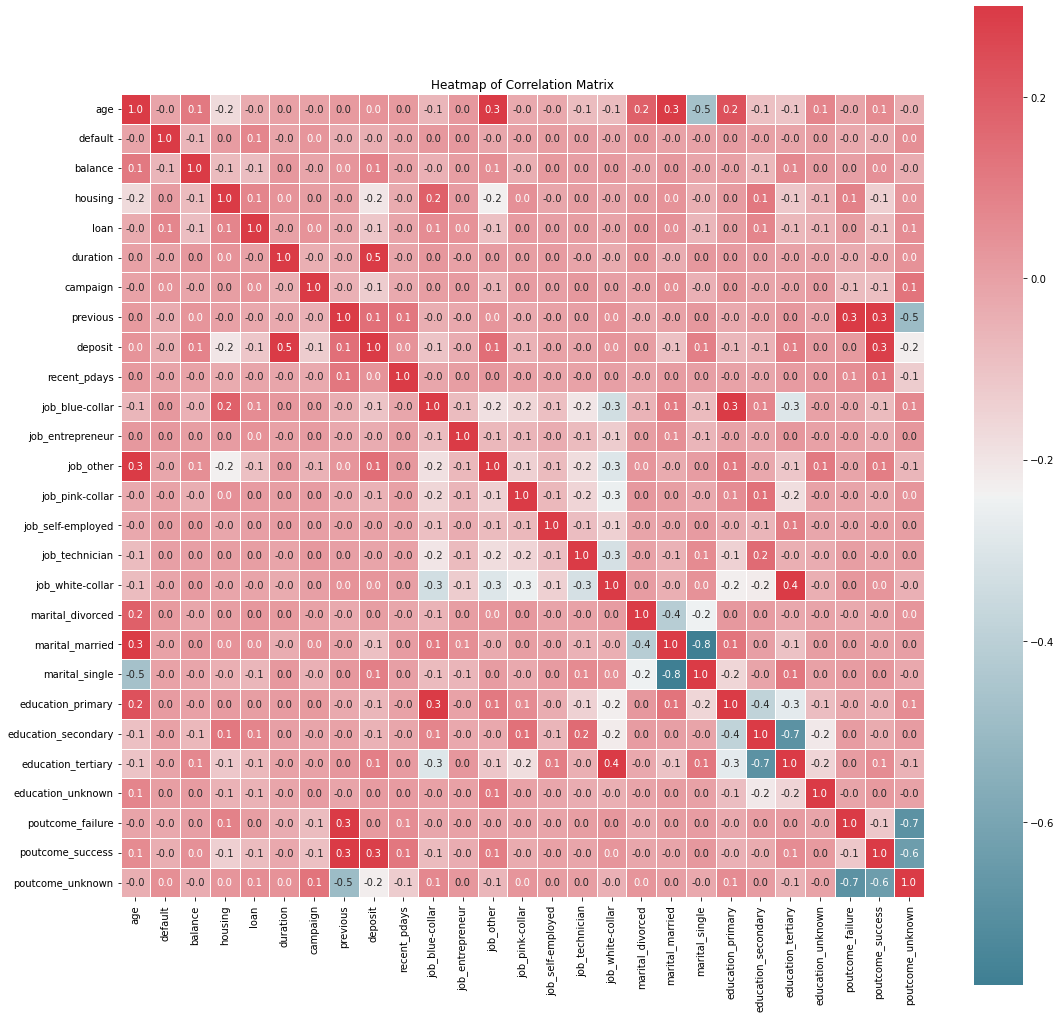

In [43]:
# Heatmap
plt.figure(figsize = (18,18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, square=True, linewidths=.5,fmt='.1f')
plt.title('Heatmap of Correlation Matrix')

In [44]:
#Extract the deposit column (the dependent variable)
corr_deposite = pd.DataFrame(corr["deposit"].drop("deposit"))
print(corr_deposite.sort_values(by= "deposit", ascending=False))

                      deposit
duration             0.451919
poutcome_success     0.286642
job_other            0.144408
previous             0.139867
marital_single       0.094632
education_tertiary   0.094598
balance              0.081129
age                  0.034901
recent_pdays         0.034457
job_white-collar     0.031621
poutcome_failure     0.020714
education_unknown    0.014355
marital_divorced     0.005228
job_self-employed   -0.004707
job_technician      -0.011557
job_entrepreneur    -0.034443
default             -0.040680
job_pink-collar     -0.051717
education_secondary -0.051952
education_primary   -0.063002
marital_married     -0.092157
job_blue-collar     -0.100840
loan                -0.110580
campaign            -0.128081
housing             -0.203888
poutcome_unknown    -0.224785


In [45]:

bank_copy = bank_copy.drop('deposit',1)


C:\Users\bhumi\AppData\Local\Temp/ipykernel_5736/2666928016.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  bank_copy = bank_copy.drop('deposit',1)


## Standardise Data

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars =['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'previous', 'recent_pdays', 'job_blue-collar', 'job_entrepreneur',
       'job_other', 'job_pink-collar', 'job_self-employed', 'job_technician',
       'job_white-collar', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_failure',
       'poutcome_success', 'poutcome_unknown']
bank_copy[num_vars]= scaler.fit_transform(bank_copy[num_vars])
bank_copy.head()

,age,default,balance,housing,loan,duration,campaign,previous,recent_pdays,job_blue-collar,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,0.532468,0.0,0.104371,1.0,0.0,0.268110,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.493506,0.0,0.078273,0.0,0.0,0.377675,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.298701,0.0,0.092185,1.0,0.0,0.357566,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.480519,0.0,0.105882,1.0,0.0,0.148750,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.467532,0.0,0.079851,0.0,0.0,0.172983,0.016129,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## split data into train and test

In [47]:
# Train split : 85% , Test split : 15% test data
from sklearn.model_selection import train_test_split
x = bank_copy
y = bank_with_dummies.deposit 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.15,random_state=50)

In [48]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (9487, 26)
x_test (1675, 26)
y_train (9487,)
y_test (1675,)


## handling  imbalanced data using SMOTE

In [49]:
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from collections import Counter
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
#summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1: 5873, 0: 5873})


## Feature Selection using Recursive feature elimination

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [51]:
# Running RFE with output number of the variable equal to 8 
rfe=RFE(lm,8)        
rfe=rfe.fit(x_train,y_train)

C:\Users\bhumi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [52]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('age', False, 16),
 ('default', False, 7),
 ('balance', True, 1),
 ('housing', True, 1),
 ('loan', False, 2),
 ('duration', True, 1),
 ('campaign', True, 1),
 ('previous', True, 1),
 ('recent_pdays', False, 5),
 ('job_blue-collar', False, 11),
 ('job_entrepreneur', False, 9),
 ('job_other', False, 3),
 ('job_pink-collar', False, 12),
 ('job_self-employed', False, 10),
 ('job_technician', False, 18),
 ('job_white-collar', False, 15),
 ('marital_divorced', False, 19),
 ('marital_married', False, 8),
 ('marital_single', False, 13),
 ('education_primary', False, 4),
 ('education_secondary', False, 17),
 ('education_tertiary', False, 6),
 ('education_unknown', False, 14),
 ('poutcome_failure', True, 1),
 ('poutcome_success', True, 1),
 ('poutcome_unknown', True, 1)]

In [53]:
col =  x_train.columns[rfe.support_]
print(col)
# Building model using statsmodel, for the detailed statistics
# Creating x_test dataframe with RFE selected variables

x_train_rfe = x_train[col]
x_train_rfe.head()

Index(['balance', 'housing', 'duration', 'campaign', 'previous',
       'poutcome_failure', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


,balance,housing,duration,campaign,previous,poutcome_failure,poutcome_success,poutcome_unknown
8539,0.130254,1.0,0.055427,0.000000,0.0,0.0,0.0,1.0
3184,0.082498,0.0,0.038412,0.000000,0.0,0.0,0.0,1.0
5958,0.080090,0.0,0.050271,0.032258,0.0,0.0,0.0,1.0
1989,0.088165,1.0,0.118072,0.016129,0.0,0.0,0.0,1.0
1944,0.103349,1.0,0.241042,0.032258,0.0,0.0,0.0,1.0


## MODEL BUILDING

### 1. logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression

#INSTANTIATE THE MODEL (USING THE DEFAULT PARAMETERS)
logreg = LogisticRegression(solver="lbfgs", max_iter=400)

#FIT THE MODEL WITH DATA
logreg.fit(x_train,y_train)


y_pred_lg= logreg.predict(x_test)


In [55]:
#IMPORT THE METRICS CLASS
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred_lg)
cnf_matrix

array([[741, 141],
       [221, 572]], dtype=int64)

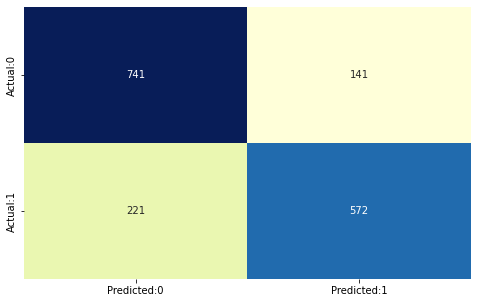

In [56]:
from sklearn.metrics import confusion_matrix
#compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lg)
#label tje confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"])
#set size of the plot
plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix, annot=True, fmt= "d", cmap="YlGnBu", cbar=False)
plt.show()

In [57]:
from sklearn.metrics import classification_report

result = classification_report(y_test, y_pred_lg)

print(result)

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       882
           1       0.80      0.72      0.76       793

    accuracy                           0.78      1675
   macro avg       0.79      0.78      0.78      1675
weighted avg       0.79      0.78      0.78      1675



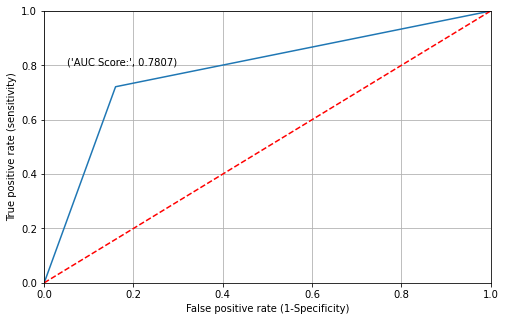

In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#set the figure size
plt.rcParams["figure.figsize"]=(8,5)

fpr, tpr, thersholds = roc_curve(y_test, y_pred_lg)

#plot the ROC curve
plt.plot(fpr, tpr)

#set limits for x and y axes
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

#plot the straight line showing worst prediction for the model
plt.plot([0,1],[0,1],"r--")

#add the AUC score
plt.text(x=0.05, y = 0.8, s=("AUC Score:", round(roc_auc_score(y_test, y_pred_lg),4)))

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance

#name the plot, and both axes
plt.xlabel("False positive rate (1-Specificity)")
plt.ylabel("True positive rate (sensitivity)")

# plot the grid
plt.grid(True)

In [59]:
from sklearn import metrics
#create a list of column names
cols = ["Model", "AUC Score", "Precision Score", "Recall Score", "Accuracy Score", "f1-score"]

#creating the required information
result_tabulation = pd.DataFrame(columns=cols)


logistic_regression = pd.Series({"Model" : "logistic_regression ", 
                                    "AUC Score" : metrics.roc_auc_score(y_test, y_pred_lg),
                                    "Precision Score" : metrics.precision_score(y_test, y_pred_lg),
                                    "Recall Score" : metrics.recall_score(y_test, y_pred_lg),
                                    "Accuracy Score" : metrics.accuracy_score(y_test, y_pred_lg),
                                    "f1-score" : metrics.f1_score(y_test, y_pred_lg)})
#appending our result table
result_tabulation = result_tabulation.append(logistic_regression , ignore_index=True)


In [60]:
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logistic_regression,0.780724,0.802244,0.721311,0.783881,0.759628


### AdaBoostClassifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier

#build the model
adaboost = AdaBoostClassifier(random_state=10)

#fit the model
adaboost.fit(x_train, y_train)

#predict the values
y_pred_adboost = adaboost.predict(x_test)

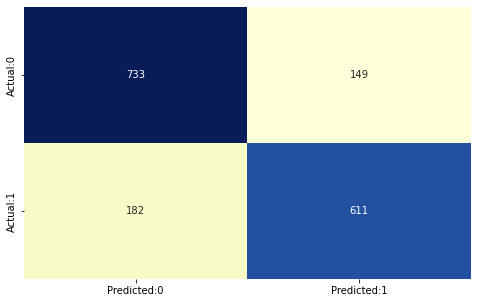

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       882
           1       0.80      0.77      0.79       793

    accuracy                           0.80      1675
   macro avg       0.80      0.80      0.80      1675
weighted avg       0.80      0.80      0.80      1675



In [62]:
from sklearn.metrics import confusion_matrix
#compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_adboost)
#label tje confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"])
#set size of the plot
plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix, annot=True, fmt= "d", cmap="YlGnBu", cbar=False)
plt.show()

result = classification_report(y_test, y_pred_adboost)

print(result)

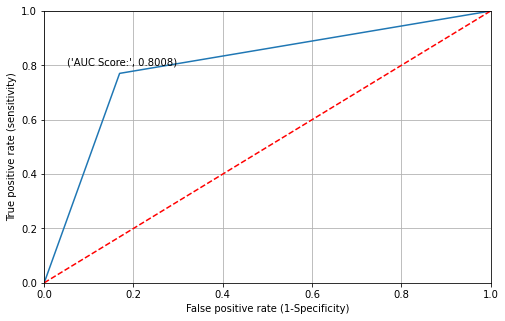

In [63]:
#set the figure size
plt.rcParams["figure.figsize"]=(8,5)

fpr, tpr, thersholds = roc_curve(y_test, y_pred_adboost)

#plot the ROC curve
plt.plot(fpr, tpr)

#set limits for x and y axes
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

#plot the straight line showing worst prediction for the model
plt.plot([0,1],[0,1],"r--")

#add the AUC score
plt.text(x=0.05, y = 0.8, s=("AUC Score:", round(roc_auc_score(y_test, y_pred_adboost),4)))

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance

#name the plot, and both axes
plt.xlabel("False positive rate (1-Specificity)")
plt.ylabel("True positive rate (sensitivity)")

# plot the grid
plt.grid(True)

In [64]:
#compiling the required information
adaboost_metrics = pd.Series({"Model" : "Adaboost", 
                                    "AUC Score" : metrics.roc_auc_score(y_test, y_pred_adboost),
                                    "Precision Score" : metrics.precision_score(y_test, y_pred_adboost),
                                    "Recall Score" : metrics.recall_score(y_test, y_pred_adboost),
                                    "Accuracy Score" : metrics.accuracy_score(y_test, y_pred_adboost),
                                    "f1-score" : metrics.f1_score(y_test, y_pred_adboost)})
#appending our result table
result_tabulation = result_tabulation.append(adaboost_metrics, ignore_index=True)

#view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logistic_regression,0.780724,0.802244,0.721311,0.783881,0.759628
1,Adaboost,0.800779,0.803947,0.770492,0.802388,0.786864


### 3. NAIVE BAYES

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier

gnb = GaussianNB()

GNB = OneVsRestClassifier(gnb)

GNB.fit(x_train,y_train)

y_pred_GNB = GNB.predict(x_test)

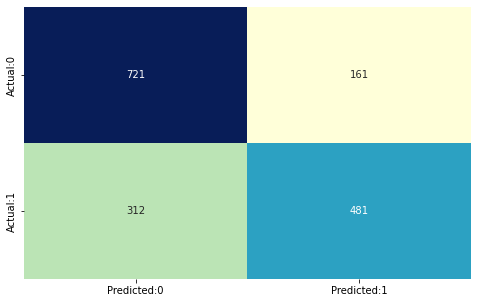

              precision    recall  f1-score   support

           0       0.70      0.82      0.75       882
           1       0.75      0.61      0.67       793

    accuracy                           0.72      1675
   macro avg       0.72      0.71      0.71      1675
weighted avg       0.72      0.72      0.71      1675



In [66]:

from sklearn.metrics import confusion_matrix
#compute the confusion matrix
cm = confusion_matrix(y_test,y_pred_GNB)

#label the confusion matrix
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],
                          index=['Actual:0','Actual:1'])
#set size of the plot
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu',cbar=False)
plt.show()

from sklearn.metrics import classification_report
result = classification_report(y_test,y_pred_GNB)

print(result)

In [67]:
Naive_bayes = pd.Series({"Model":"Naive bayes",
                        'Precision Score': metrics.precision_score(y_test,y_pred_GNB,average="macro"),
                        'Recall Score': metrics.recall_score(y_test,y_pred_GNB,average="macro"),
                        'Accuracy Score': metrics.accuracy_score(y_test,y_pred_GNB),
                        'f1-score': metrics.f1_score(y_test,y_pred_GNB,average="macro")})

result_tabulation = result_tabulation.append(Naive_bayes , ignore_index=True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logistic_regression,0.780724,0.802244,0.721311,0.783881,0.759628
1,Adaboost,0.800779,0.803947,0.770492,0.802388,0.786864
2,Naive bayes,NaN,0.723594,0.712009,0.717612,0.711693


### 4.KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(x_train,y_train)

y_pred_knn = knn.predict(x_test)

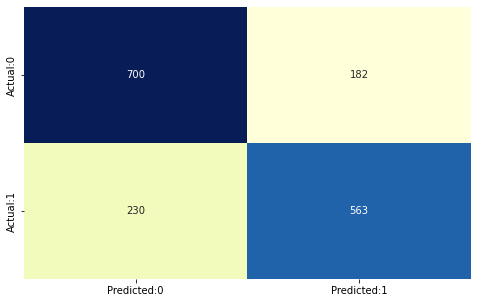

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       882
           1       0.76      0.71      0.73       793

    accuracy                           0.75      1675
   macro avg       0.75      0.75      0.75      1675
weighted avg       0.75      0.75      0.75      1675



In [69]:
from sklearn.metrics import confusion_matrix
#compute the confusion matrix
cm = confusion_matrix(y_test,y_pred_knn)

#label the confusion matrix
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],
                          index=['Actual:0','Actual:1'])
#set size of the plot
plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu',cbar=False)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

In [70]:
KNN = pd.Series({"Model":"KNN",
                        'Precision Score': metrics.precision_score(y_test,y_pred_knn,average="macro"),
                        'Recall Score': metrics.recall_score(y_test,y_pred_knn,average="macro"),
                        'Accuracy Score': metrics.accuracy_score(y_test,y_pred_knn),
                        'f1-score': metrics.f1_score(y_test,y_pred_knn,average="macro")})

result_tabulation = result_tabulation.append(KNN, ignore_index=True)

result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logistic_regression,0.780724,0.802244,0.721311,0.783881,0.759628
1,Adaboost,0.800779,0.803947,0.770492,0.802388,0.786864
2,Naive bayes,NaN,0.723594,0.712009,0.717612,0.711693
3,KNN,NaN,0.754196,0.751806,0.754030,0.752373


### 5.SVM

In [71]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state = 1)
classifier.fit(x_train,y_train)

y_pred_svm = classifier.predict(x_test)

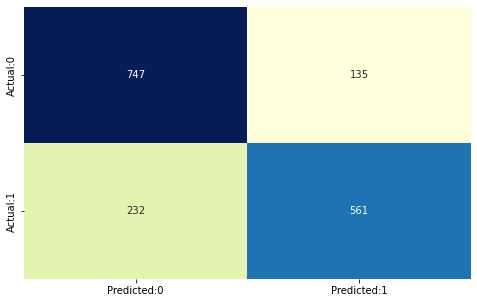

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       882
           1       0.81      0.71      0.75       793

    accuracy                           0.78      1675
   macro avg       0.78      0.78      0.78      1675
weighted avg       0.78      0.78      0.78      1675



In [72]:
from sklearn.metrics import confusion_matrix
#compute the confusion matrix
cm = confusion_matrix(y_test,y_pred_svm)

#label the confusion matrix
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],
                          index=['Actual:0','Actual:1'])
#set size of the plot
plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu',cbar=False)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))

In [73]:
SVM = pd.Series({"Model":"SVM",
                        'Precision Score': metrics.precision_score(y_test,y_pred_svm,average="macro"),
                        'Recall Score': metrics.recall_score(y_test,y_pred_svm,average="macro"),
                        'Accuracy Score': metrics.accuracy_score(y_test,y_pred_svm),
                        'f1-score': metrics.f1_score(y_test,y_pred_svm,average="macro")})

result_tabulation = result_tabulation.append(SVM, ignore_index=True)

result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logistic_regression,0.780724,0.802244,0.721311,0.783881,0.759628
1,Adaboost,0.800779,0.803947,0.770492,0.802388,0.786864
2,Naive bayes,NaN,0.723594,0.712009,0.717612,0.711693
3,KNN,NaN,0.754196,0.751806,0.754030,0.752373
4,SVM,NaN,0.784529,0.777189,0.780896,0.778160


In [74]:

from sklearn.tree import export_graphviz
#export_graphviz function generates a GraphViz representation of desision tree

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline
# Decision tree with max depth 

dt1 = tree.DecisionTreeClassifier()
dt1.fit(x_train,y_train)
dt1_score_train = dt1.score(x_train,y_train)
print("Training score :",dt1_score_train)
dt1_score_test = dt1.score(x_test,y_test)
print("Test score :",dt1_score_test)

Training score : 1.0
Test score : 0.7253731343283583


In [75]:
features = bank_copy.columns.tolist()
features

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'duration',
 'campaign',
 'previous',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

In [76]:
# Investigate most imp features with depth = 2

dt1 = tree.DecisionTreeClassifier(random_state=1,max_depth=2)

#fit the decision tree classifier

dt1.fit(x_train,y_train)

dt1_score_train = dt1.score(x_train,y_train)
print("Training score:", dt1_score_train)
dt1_score_test = dt1.score(x_train,y_train)
print("Testing score:", dt1_score_test)
fi = dt1.feature_importances_

l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

Training score: 0.7291029830294087
Testing score: 0.7291029830294087
age................. 0.0
default............. 0.0
balance............. 0.0
housing............. 0.0
loan................ 0.0
duration............ 0.8495881402243388
campaign............ 0.0
previous............ 0.0
recent_pdays........ 0.0
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_other........... 0.0
job_pink-collar..... 0.0
job_self-employed... 0.0
job_technician...... 0.0
job_white-collar.... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_primary... 0.0
education_secondary. 0.0
education_tertiary.. 0.0
education_unknown... 0.0
poutcome_failure.... 0.0
poutcome_success.... 0.15041185977566116
poutcome_unknown.... 0.0


In [77]:
# According to feature importance results most import feature is "Duration"
# Lets calc stats on Duration

print("Mean duration :", bank_with_dummies.duration.mean())
print("Max duration :", bank_with_dummies.duration.max())
print("Min duration :", bank_with_dummies.duration.min())

Mean duration : 371.99381831213043
Max duration : 3881
Min duration : 2


In [78]:
# Predict : successful deposit with a call duration = 311 sec

print(dt1.predict_proba(np.array([0,0,311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1,-1)))
print(dt1.predict(np.array([0,0,311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1,-1)))



[[0.172 0.828]]
[1]


In [79]:
# Predict : successful deposit with a call duration = 1033 sec

print(dt1.predict_proba(np.array([0,0,1033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1,-1)))
print(dt1.predict(np.array([0,0,1033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1,-1)))


[[0.172 0.828]]
[1]
